In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
df2 =df.copy() #copy of original dataframe to keep original unaffected

How many rows/columns?

In [ ]:
num_rows, num_columns = df2.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 32581
Number of columns: 11


Descriptive Statistics

In [ ]:
# Descriptive Statistics for Numerical Variables
numerical_stats = df2.describe()
print("Descriptive Statistics for Numerical Variables:")
numerical_stats

Descriptive Statistics for Numerical Variables:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Drop rows where person_age is older than 100
df2 = df2[df2['person_age'] <= 100]

# Drop rows where person_emp_length is more than 80
df2 = df2[df2['person_emp_length'] <= 80]

In [ ]:
#after dropping
df2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31679.000000,3.167900e+04,31679.000000,31679.000000,28632.000000,31679.000000,31679.000000,31679.000000
mean,27.730673,6.649010e+04,4.782064,9659.962436,11.039701,0.215442,0.169610,5.809211
std,6.213427,5.276879e+04,4.034948,6334.360554,3.229409,0.411135,0.106269,4.059710
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Descriptive Statistics for Categorical Variables
categorical_stats = df2.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Variables:")
categorical_stats


Descriptive Statistics for Categorical Variables:


,person_home_ownership,loan_intent,cb_person_default_on_file
count,31679,31679,31679
unique,4,6,2
top,RENT,EDUCATION,N
freq,16072,6288,26051


In [ ]:
df2.person_home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [ ]:
df2.loan_intent.unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df2.cb_person_default_on_file.unique()

array(['N', 'Y'], dtype=object)

Missing values

In [ ]:
df2.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Handling missing values

In [ ]:
df2['person_emp_length'].fillna(df2['person_emp_length'].mean(), inplace=True)
df2['loan_int_rate'].fillna(df2['loan_int_rate'].mean(), inplace=True)


In [ ]:
df2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Check data types:

In [ ]:
df2.dtypes


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Distribution of Target Variable:

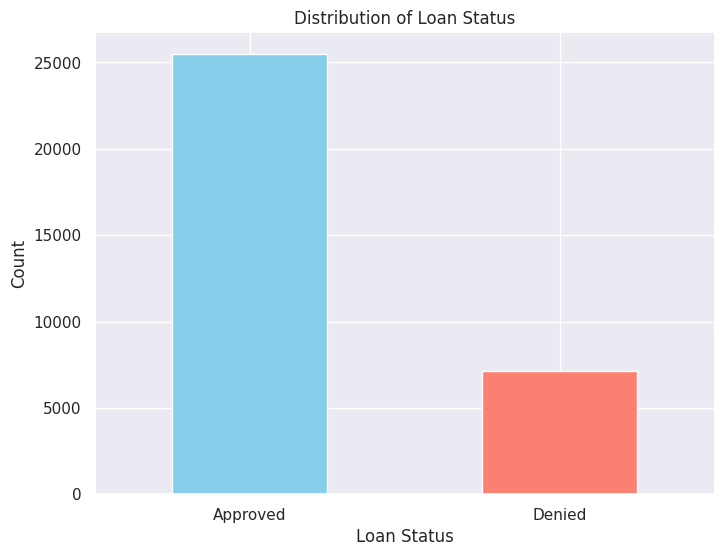

0: 24854
1: 6825


In [ ]:
plt.figure(figsize=(8, 6))
df['loan_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Approved', 'Denied'], rotation=0)
plt.show()

count_values = df2['loan_status'].value_counts()
for index, value in count_values.items():
    print(f"{index}: {value}")

Distribution of Numerical Features: Visualize the distributions of numerical features.

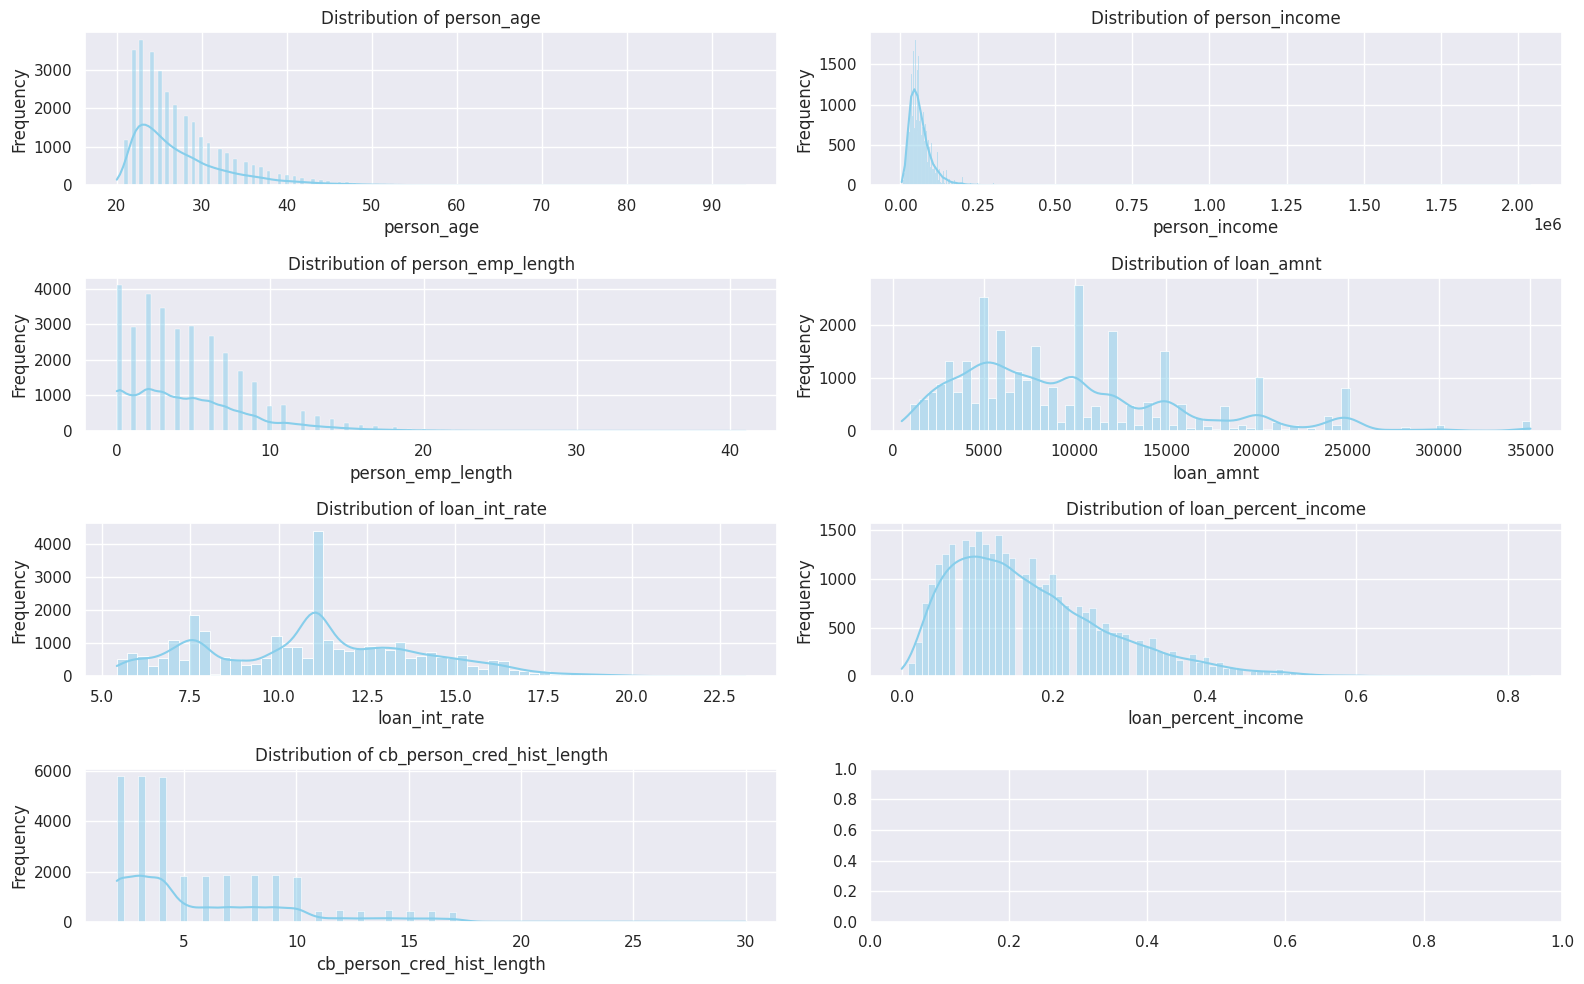

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Features
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))

for i, feature in enumerate(numerical_features):
    sns.histplot(df2[feature], kde=True, color='skyblue', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Checking Outliers

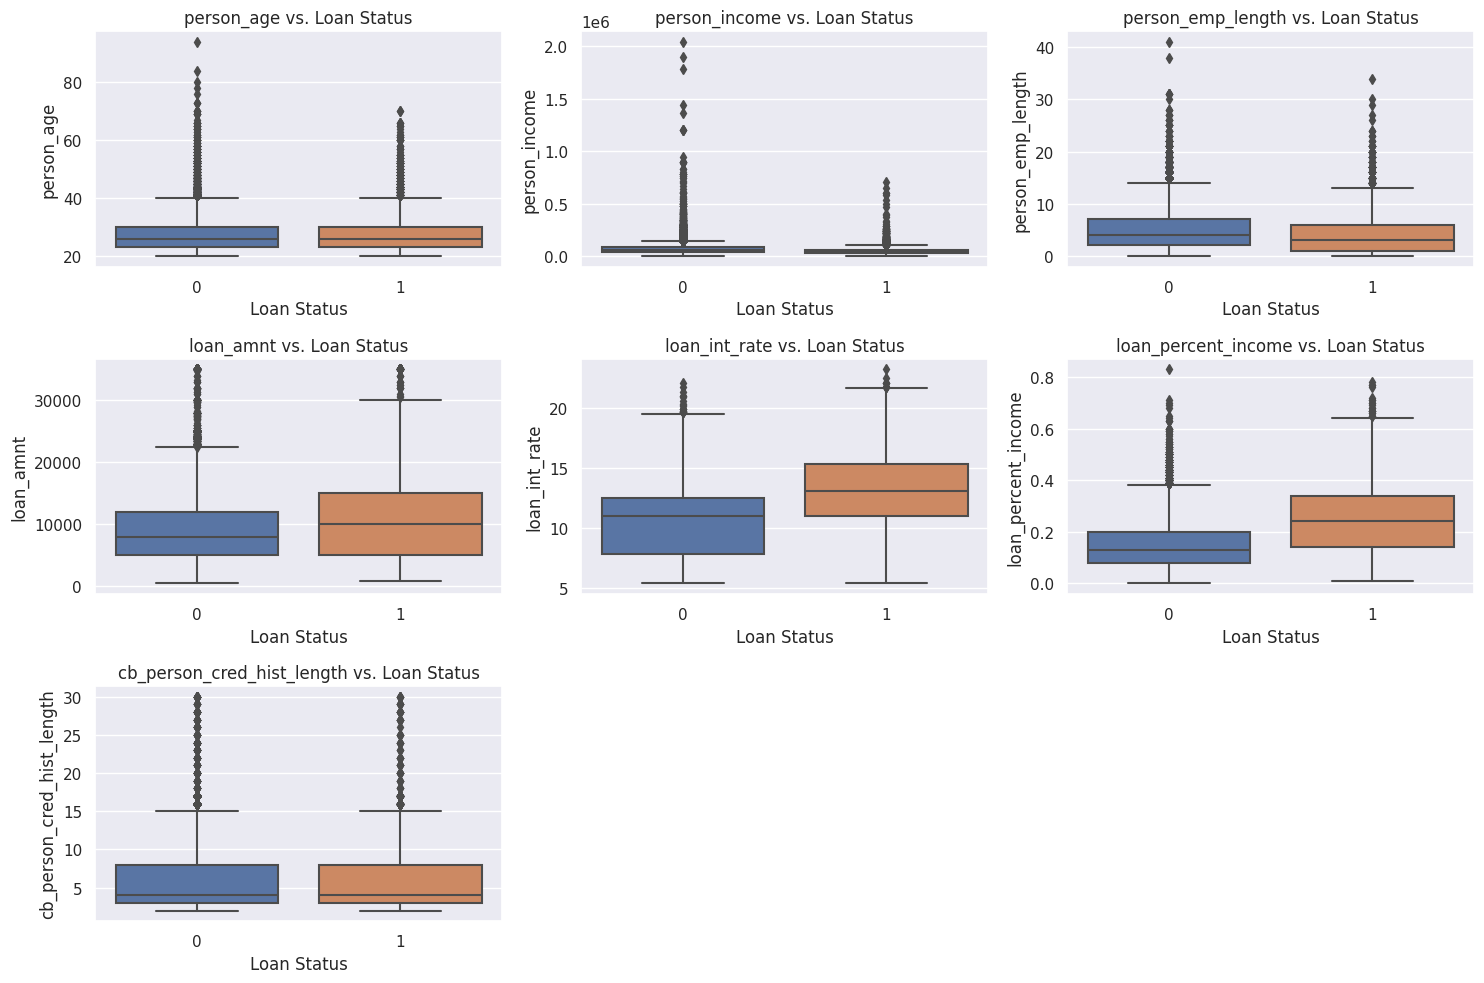

In [ ]:
# Numerical Features vs. Loan Status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=feature, data=df2)
    plt.title(f'{feature} vs. Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Categorical Features vs. Loan Status

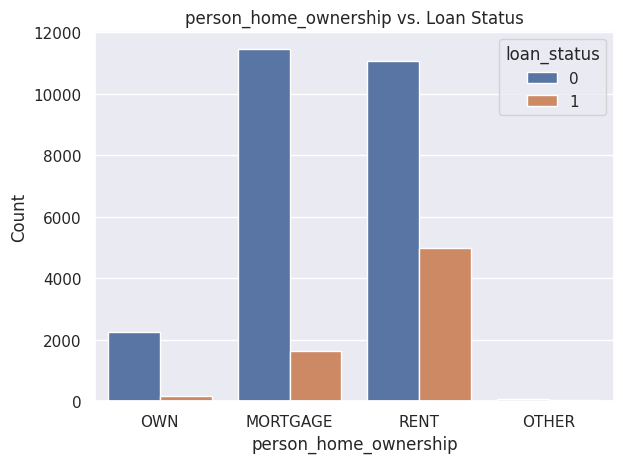

loan_status  person_home_ownership
0            MORTGAGE                 11460
             RENT                     11077
             OWN                       2243
             OTHER                       74
1            RENT                      4995
             MORTGAGE                  1630
             OWN                        167
             OTHER                       33
Name: person_home_ownership, dtype: int64


In [ ]:
# Categorical Features vs. Loan Status
sns.countplot(x=df2['person_home_ownership'], hue='loan_status', data=df2)
plt.title('person_home_ownership vs. Loan Status')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

groupby_p = df2.groupby('loan_status')['person_home_ownership']
print(groupby_p.value_counts())

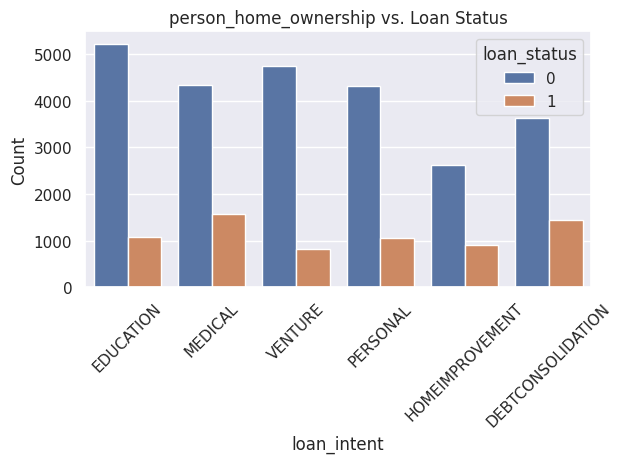

loan_status  loan_intent      
0            EDUCATION            5222
             VENTURE              4739
             MEDICAL              4332
             PERSONAL             4321
             DEBTCONSOLIDATION    3627
             HOMEIMPROVEMENT      2613
1            MEDICAL              1565
             DEBTCONSOLIDATION    1437
             EDUCATION            1066
             PERSONAL             1046
             HOMEIMPROVEMENT       897
             VENTURE               814
Name: loan_intent, dtype: int64


In [ ]:
sns.countplot(x=df2['loan_intent'], hue='loan_status', data=df2)
plt.title('person_home_ownership vs. Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

groupby_p = df2.groupby('loan_status')['loan_intent']
print(groupby_p.value_counts())

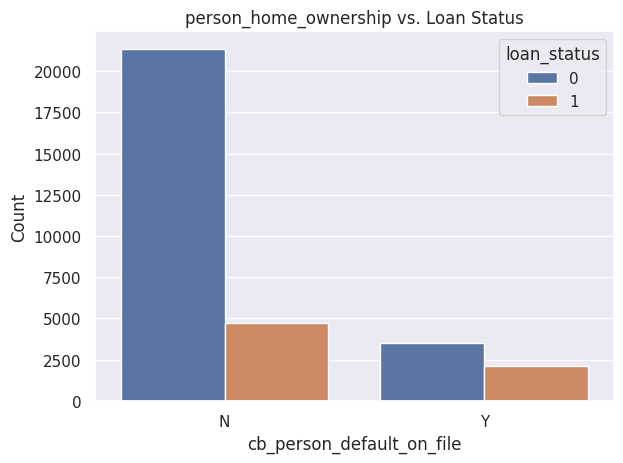

loan_status  cb_person_default_on_file
0            N                            21340
             Y                             3514
1            N                             4711
             Y                             2114
Name: cb_person_default_on_file, dtype: int64


In [ ]:
sns.countplot(x=df2['cb_person_default_on_file'], hue='loan_status', data=df2)
plt.title('person_home_ownership vs. Loan Status')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

groupby_p = df2.groupby('loan_status')['cb_person_default_on_file']
print(groupby_p.value_counts())

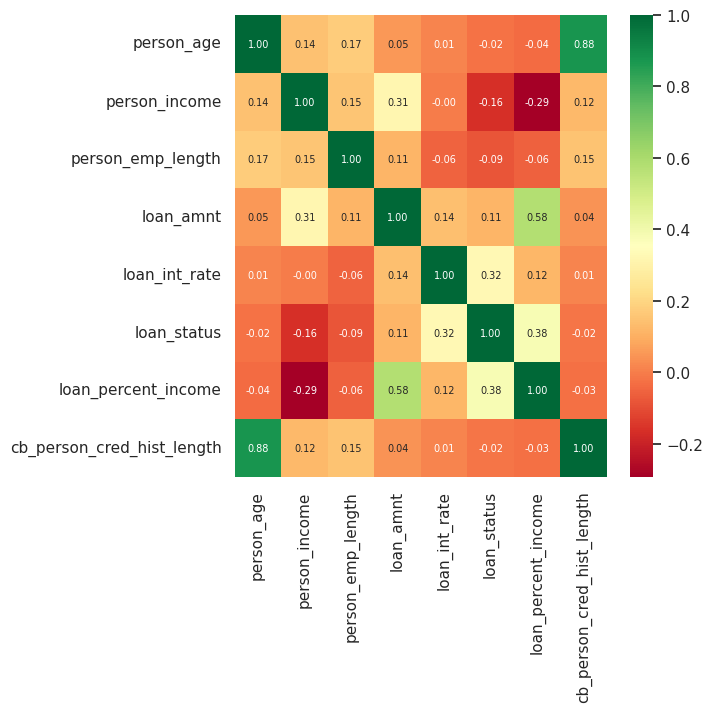

In [ ]:
  # Heatmap

df_corr = df2.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 7}, ax=ax)
plt.show()

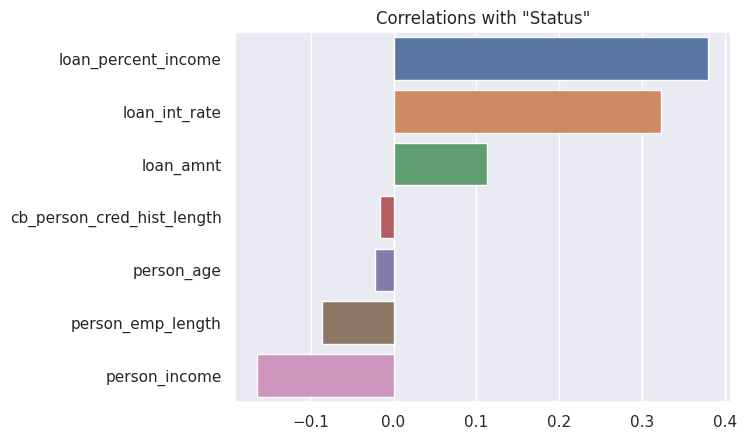

In [ ]:
#Correlations with "Status"

limit = -1.0

data = df2.corr()["loan_status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()

Prepare feature variables:
Extracting categorical, numerical, and boolean columns

In [ ]:
# Categorical columns
cat_cols = ['person_home_ownership', 'loan_intent']

# numerical columns
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# boolean column
bool_col = ['cb_person_default_on_file']

In [ ]:
def convert_bools(df2):
    map_dict = {'Y': 1.0, 'N': 0.0}
    df = df.replace(map_dict)
    return df

In [ ]:
loan_df_0_1_bool = convert_bools(df2)

In [ ]:
loan_df_dummies = pd.get_dummies(loan_df_0_1_bool, columns = cat_cols, drop_first = True, prefix = ['HO','LI'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# identify target variable and independent variables and split them into train and test

X = loan_df_dummies.drop('loan_status',axis = 1)
y = loan_df_dummies['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10) # random _state controls shuffling process

models

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib import pyplot
import numpy as np

In [ ]:
# LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Prediction
y_pred = log_reg_model.predict(X_test)

In [ ]:
y_pred_proba = log_reg_model.predict_proba(X_test)
y_pred_proba

array([[0.98937509, 0.01062491],
       [0.87981066, 0.12018934],
       [0.9726816 , 0.0273184 ],
       ...,
       [0.74740383, 0.25259617],
       [0.61759417, 0.38240583],
       [0.61713238, 0.38286762]])

Model Performance

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", round(acc*100))

Logistic Regression model accuracy (in %): 81


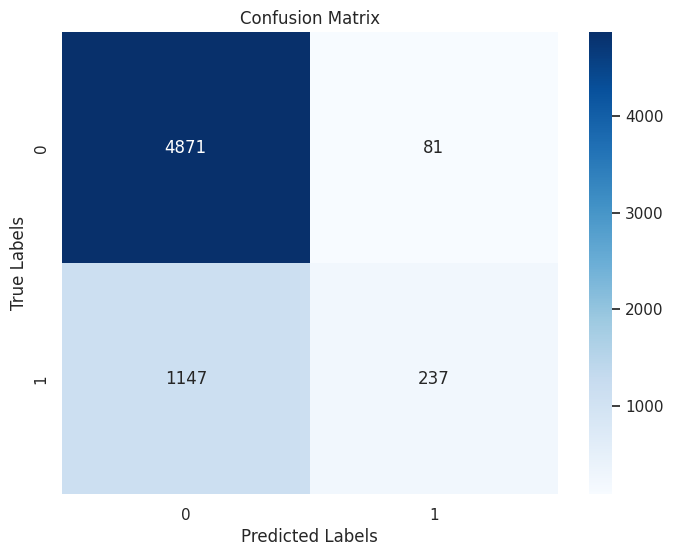

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# all features
print(classification_report(y_test,y_pred, target_names = ['Non_defaulted_loan','Defaulted_loan']))

                    precision    recall  f1-score   support

Non_defaulted_loan       0.81      0.98      0.89      4952
    Defaulted_loan       0.75      0.17      0.28      1384

          accuracy                           0.81      6336
         macro avg       0.78      0.58      0.58      6336
      weighted avg       0.80      0.81      0.75      6336



Random Forest Classifier

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

Visualize Random Forest Feature Importance

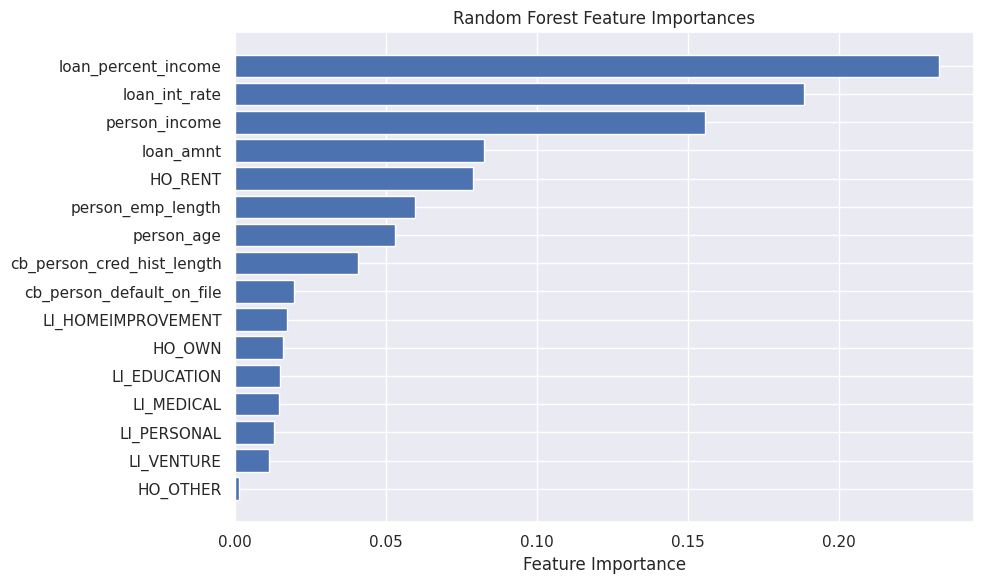

In [ ]:
# Plot feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Visualize Confusion Matrix

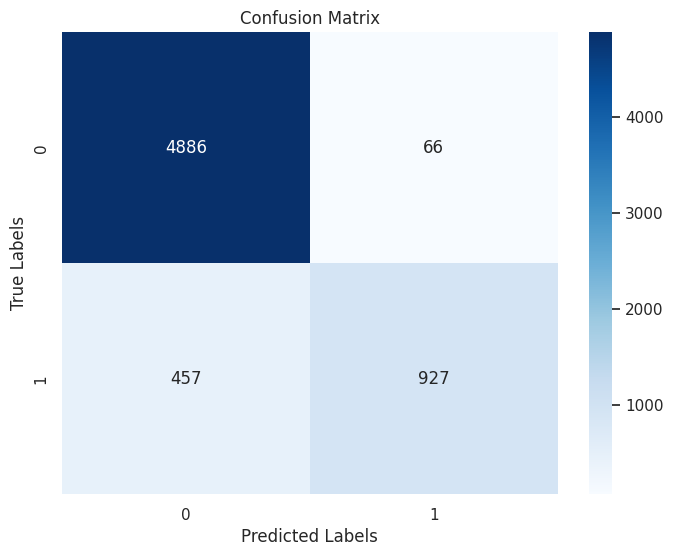

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9174558080808081
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4952
           1       0.93      0.67      0.78      1384

    accuracy                           0.92      6336
   macro avg       0.92      0.83      0.86      6336
weighted avg       0.92      0.92      0.91      6336

